In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

# Change working directory to be current folder
# os.chdir('/content/gdrive/My Drive/Your Folder Name/Your sub Folder Name')
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
!ls

Mounted at /content/gdrive
 3_1_wordnet.ipynb
 3_2_pos_tagging_V2.ipynb
 3_3_ner_V4.ipynb
 appendix_failure_prediction_Python_colab.ipynb
 data_failure_prediction_test.csv
 data_failure_prediction_train.csv
'LDA Topic Modelling and Sentiment Analysis through YouTube Videos'\'' Comments (Unsupervised ML).ipynb'
 output.csv
'reviews_analysis _v2.csv'
 reviews_clean2.csv
'sentimental analysis_Airbnb reviews.ipynb'
 sentiment-analysis-and-collocation-of-reviews.ipynb
 wk_NN_R_colab.ipynb


In [ ]:
df = pd.read_csv('reviews_clean2.csv')

In [ ]:
df.head()

,listing_id,reviewer_id,Date,comments_cd
0,3209752.0,20987832,5/9/2019,"Thank you for making me feel at home, it is su..."
1,3209752.0,3963956,10/9/2019,"An absolutely amazing place. Its clean, stylis..."
2,3209752.0,66599486,14/9/2019,This location is private yet it is only 400m w...
3,3209752.0,110050140,30/9/2019,Jeremy is a great host that will make your sta...
4,3209752.0,10136440,11/10/2019,"This place is great! Very clean, very cozy, ve..."


In [ ]:
from textblob import TextBlob

In [ ]:
def analyze_seentimment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    if sentiment >0:
      return 'positive'
    elif sentiment <0:
      return 'negative'
    else :
      return 'neutral'

df['sentiment'] = df['comments_cd'].apply(analyze_seentimment)

In [ ]:
df['sentiment'].describe()
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

positive    17230
negative      540
neutral       523
Name: sentiment, dtype: int64

Here we use SentimentIntensityAnalyzer to conduct the sentimental analysis

In [ ]:
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in df['comments_cd'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Thank you for making me feel at home, it is such a pleasant stay. I feel safe and taken care of even its just for one night. You are also flexible in letting me store my baggage after check out until I come back to collect it later in the evening. It saves me the hassle of taking the luggage with me to work, and while looking around for new place to stay. You let me have the bread and cheese breakfast also saves me a lot of time in the morning rush hour, and therefore I don't have to starve at work. Can't express how appreciative I am to you for your hospitality.
compound: 0.9058, neg: 0.024, neu: 0.841, pos: 0.135, 
An absolutely amazing place. Its clean, stylish, perfectly located, it smells great and its quite. I dont really see anything I would change. And the swimming is a dream! Very highly recommended, you can book with your eyes closed!
compound: 0.964, neg: 0.0, neu: 0.599, pos: 0.401, 
This location is private yet it is only 400m walk from the nearest bus stop. This place is 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the
    natural language of the input text
    """

    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)

    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))

    return language_likelihood

def get_language(input_text):
    """Return the most likely language of the given text
    """
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [ ]:
import nltk
nltk.download('stopwords')
reviews_f = [r for r in df['comments_cd'] if pd.notnull(r) and get_language(r) == 'english']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

<Axes: ylabel='Frequency'>

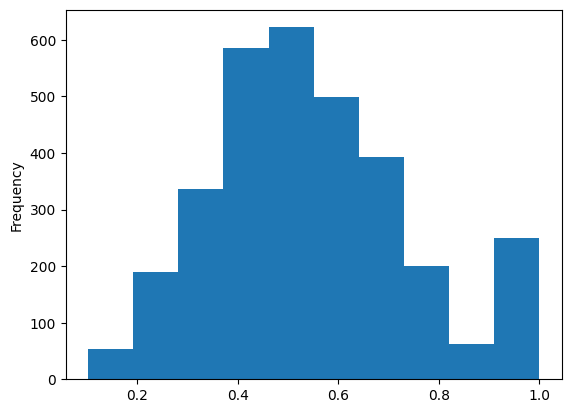

In [ ]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

<Axes: ylabel='Frequency'>

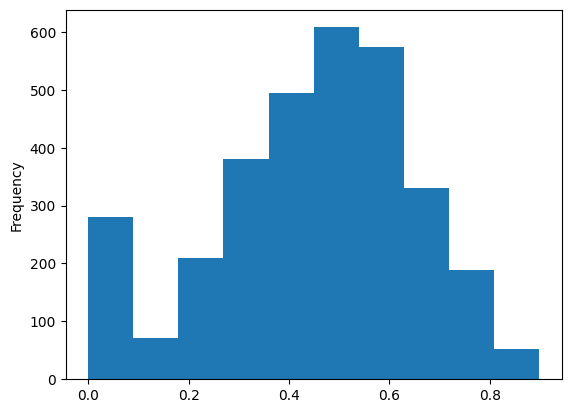

In [ ]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

<Axes: ylabel='Frequency'>

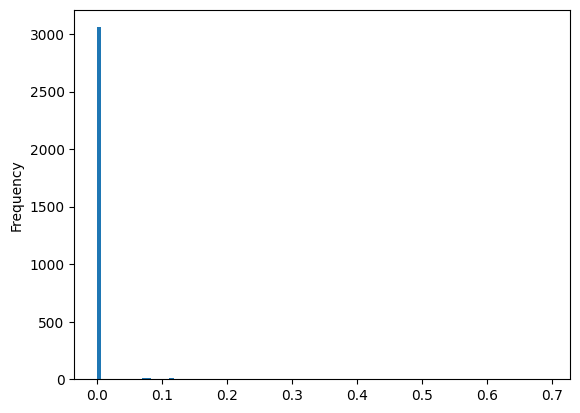

In [ ]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

In [ ]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) == 'english']
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

In [ ]:
scored_reviews.head()

,review,compound,negativity,neutrality,positivity
0,Clean and tidy room in shared apartment in Cha...,0.8316,0.000,0.529,0.471
1,Perfect location and very responsive host. Sma...,0.6801,0.135,0.568,0.298
2,The host canceled this reservation 123 days be...,0.0000,0.000,1.000,0.000
3,Attractive place to stay for 4pax when visit S...,0.4404,0.000,0.734,0.266
4,The location is very close to EXPO and Bus sto...,-0.1531,0.062,0.938,0.000


In [ ]:
scored_reviews.query('negativity > 0')

,review,compound,negativity,neutrality,positivity
1,Perfect location and very responsive host. Sma...,0.6801,0.135,0.568,0.298
4,The location is very close to EXPO and Bus sto...,-0.1531,0.062,0.938,0.000
11,Very easy to access and communicate. No thrill...,0.8072,0.074,0.512,0.414
84,This place was nice for my stay in Singapore. ...,0.9477,0.035,0.569,0.396
140,"Great host, great place, great location. Mart...",0.9690,0.117,0.286,0.598
...,...,...,...,...,...
3147,Its nice but no window,-0.2263,0.364,0.390,0.247
3151,"Ray is amazing, all the staff is friendly. I h...",0.8439,0.051,0.657,0.292
3167,Very accessible location.<br/>The hostel is cl...,0.3818,0.096,0.719,0.185
3178,It takes 3 days to solve the problem with inte...,-0.2263,0.186,0.690,0.124


In [ ]:
scored_reviews.iloc[3178]['review']

'It takes 3 days to solve the problem with internet and tv connection.'

In [ ]:
scored_reviews.iloc[1]['review']

'Perfect location and very responsive host. Smaller than expected and limited daylight in the rooms. Be prepared with very limited kitchen.'

In [ ]:
scored_reviews.iloc[3167]['review']

'Very accessible location.<br/>The hostel is clean, tidy and quiet. Located on the 4th floor but no elevator. Wish the male/female common bathroom/toilet are separated...'

In [ ]:
# this is a good reviews actually but included in the negative reviews
scored_reviews.iloc[140]['review']

'Great host, great place, great location.  Martin is excellent, fast communication, place was sparkling clean. Washer/dryer worked perfectly.  I have no complaints.'

In [ ]:
scored_reviews.iloc[84]['review']

'This place was nice for my stay in Singapore. Very straight forward and comfortable. No frills but the location was unbeatable. Id definitely recommend and Elizabeth was very communicative and gave great tips.'

In [ ]:
smean=scored_reviews['negativity'].mean()
smedian=scored_reviews['negativity'].median()
q1 = scored_reviews['negativity'].quantile(0.25)
q3 = scored_reviews['negativity'].quantile(0.75)
print(smean," ", smedian," ", q1, " ", q3)

0.007121630094043886   0.0   0.0   0.0


In [ ]:
len(scored_reviews.query('negativity > positivity'))

40

In [ ]:
negative_reviews = scored_reviews.query('negativity > positivity')

In [ ]:
scored_reviews.iloc[3127]['review']

'Wonderful place to stay at, if you understand the renting situation in Singapore. Extremely homely, but temper expectations that it is not a hotel.'

In [ ]:
all_comments = ' '.join(negative_reviews['review'])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk import word_tokenize, pos_tag
from collections import Counter
import re
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tokens = word_tokenize(all_comments)
tags = pos_tag(tokens)
nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]

In [ ]:
stop_words = set(stopwords.words('english'))
custom_words_to_remove = ['comment', 'feedback', 'product', 'experience']

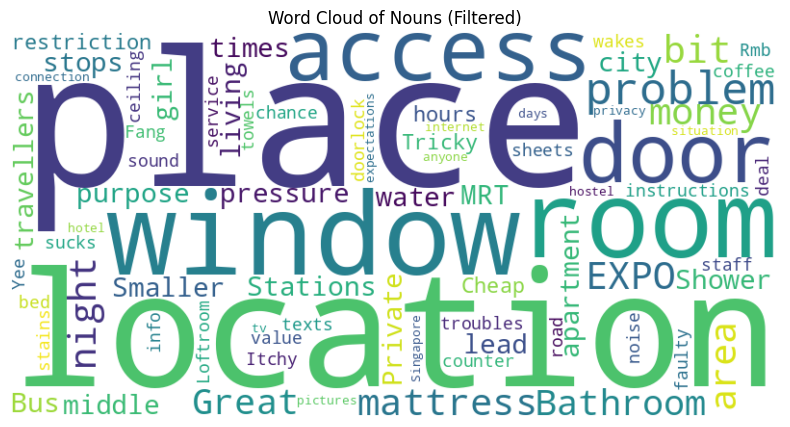

In [ ]:
filtered_nouns = [word for word in nouns if word.lower() not in stop_words and word.lower() not in custom_words_to_remove]

# 生成名词的词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_nouns))

# 使用 matplotlib 绘制词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Nouns (Filtered)')
plt.show()

In [ ]:
positive_reviews = scored_reviews.query('negativity < positivity')

In [ ]:
good_comments = ' '.join(positive_reviews['review'])

In [ ]:
tokens_good = word_tokenize(good_comments)
tag_good = pos_tag(tokens_good)
nouns_good = [word for word, pos in tag_good if pos in ['NN', 'NNS', 'NNP', 'NNPS']]

In [ ]:
stop_words = set(stopwords.words('english'))
custom_words_to_remove = ['comment', 'feedback', 'product', 'experience','br']

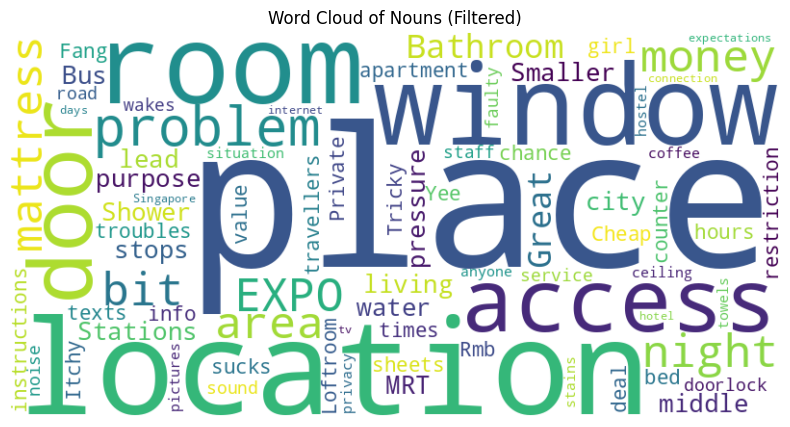

In [ ]:
filtered_nouns_good = [word for word in nouns if word.lower() not in stop_words and word.lower() not in custom_words_to_remove]

# 生成名词的词云图
wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_nouns_good))

# 使用 matplotlib 绘制词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Nouns (Filtered)')
plt.show()

Voting for an sentimental results

In [ ]:
results = pd.read_csv('reviews_analysis _v2.csv')
results.head(5)

,listing_id,reviewer_id,Date,comments_cd,topics,top_topic,sentiment,sentiment_nltk,sentiment_tran,label
0,3209752.0,20987832,5/9/2019,"Thank you for making me feel at home, it is su...","[(0, 0.012071911), (1, 0.38986126), (2, 0.5314...",2,positive,positive,positive,Experience
1,3209752.0,3963956,10/9/2019,"An absolutely amazing place. Its clean, stylis...","[(0, 0.38534018), (1, 0.378103), (2, 0.1938629...",0,positive,positive,positive,Location
2,3209752.0,66599486,14/9/2019,This location is private yet it is only 400m w...,"[(0, 0.56336075), (1, 0.028366426), (2, 0.3786...",0,positive,positive,positive,Location
3,3209752.0,110050140,30/9/2019,Jeremy is a great host that will make your sta...,"[(0, 0.65441656), (1, 0.02839842), (2, 0.03007...",0,positive,positive,positive,Location
4,3209752.0,10136440,11/10/2019,"This place is great! Very clean, very cozy, ve...","[(0, 0.083861485), (1, 0.08333527), (2, 0.7484...",2,positive,positive,positive,Experience


In [ ]:
def majority_row(row):
    positive_votes = row['sentiment'].count('positive') + row['sentiment_nltk'].count('positive') + row['sentiment_tran'].count('positive')
    negative_votes = row['sentiment'].count('negative') + row['sentiment_nltk'].count('negative') + row['sentiment_tran'].count('negative')

    if positive_votes > negative_votes:
        return 'positive'
    elif negative_votes > positive_votes:
        return 'negative'
    else:
        return 'neutral'

results['Final_Result'] = results.apply(majority_row, axis=1)

In [ ]:
# 打印结果
results.head(10)

,listing_id,reviewer_id,Date,comments_cd,topics,top_topic,sentiment,sentiment_nltk,sentiment_tran,label,Final_Result
0,3209752.0,20987832,5/9/2019,"Thank you for making me feel at home, it is su...","[(0, 0.012071911), (1, 0.38986126), (2, 0.5314...",2,positive,positive,positive,Experience,positive
1,3209752.0,3963956,10/9/2019,"An absolutely amazing place. Its clean, stylis...","[(0, 0.38534018), (1, 0.378103), (2, 0.1938629...",0,positive,positive,positive,Location,positive
2,3209752.0,66599486,14/9/2019,This location is private yet it is only 400m w...,"[(0, 0.56336075), (1, 0.028366426), (2, 0.3786...",0,positive,positive,positive,Location,positive
3,3209752.0,110050140,30/9/2019,Jeremy is a great host that will make your sta...,"[(0, 0.65441656), (1, 0.02839842), (2, 0.03007...",0,positive,positive,positive,Location,positive
4,3209752.0,10136440,11/10/2019,"This place is great! Very clean, very cozy, ve...","[(0, 0.083861485), (1, 0.08333527), (2, 0.7484...",2,positive,positive,positive,Experience,positive
5,3209752.0,153465674,26/10/2019,I was amazed with the interior design of the h...,"[(0, 0.3335055), (1, 0.375675), (2, 0.27027935...",1,positive,positive,positive,Room Condition,positive
6,3209752.0,51293660,13/11/2019,A clean apartment with great pool within close...,"[(0, 0.8116268), (1, 0.06280601), (2, 0.062506...",0,positive,positive,positive,Location,positive
7,3209752.0,83159081,15/11/2019,Jeremy is a good host who pays attention to d...,"[(0, 0.8827821), (1, 0.036044), (2, 0.04154935...",0,positive,positive,positive,Location,positive
8,3209752.0,81613938,8/12/2019,5/5 - definitely recommend this one if you wan...,"[(0, 0.08888589), (1, 0.08348493), (2, 0.74429...",2,positive,positive,positive,Experience,positive
9,3209752.0,141308801,16/12/2019,Jeremys place is exactly what it advertises. C...,"[(0, 0.053240433), (1, 0.05035485), (2, 0.8459...",2,positive,positive,positive,Experience,positive


In [ ]:
len(results.query('Final_Result ==\'negative\' '))

775

In [ ]:
len(results.query('Final_Result ==\'neutral\' '))

164

In [ ]:
pd.set_option('display.max_colwidth', None)
results.query('Final_Result ==\'neutral\' ')['comments_cd']

107                                                                                                                                                                                                                                                                                                                                                                                       Great location, host, and value for money! Subway and buses are few min away. If youre travelling on a budget, like your own space and hate sleeping pods, book Peggys stay!
194                                                                                                                                                                                                                                                                                                                                                                                                                 It has rooms without windows.  The flat is ov

In [ ]:
len(results.query('Final_Result ==\'positive\' '))

17354

In [ ]:
new_bad_reviews=results.query('Final_Result ==\'negative\' ')

In [ ]:
new_good_reviews = results.query('Final_Result ==\'positive\' ')

In [ ]:
new_all_comments=' '.join(new_bad_reviews['comments_cd'])
tokensn=word_tokenize(new_all_comments)
new_filtered_tokens = [word for word in tokensn if word.lower() not in stop_words and word.lower() not in custom_words_to_remove and len(word)>4]

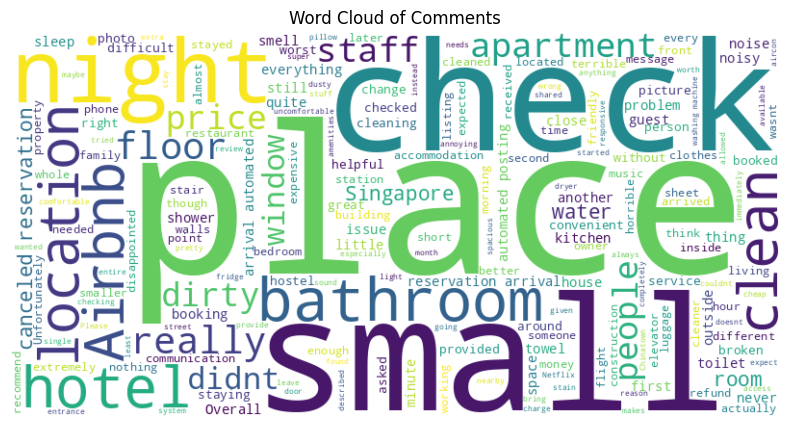

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nwordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(new_filtered_tokens))

# 使用 matplotlib 绘制词云图
plt.figure(figsize=(10, 5))
plt.imshow(nwordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

Conduct 2 gram sentimental analysis on bad reviews

In [ ]:
import string
pos_tags = pos_tag(tokensn)
remove_words=['comment', 'feedback', 'product', 'experience','br','airbnb','time']
def is_valid(word):
    return word.isalpha() and word.lower() not in stop_words and word.lower() not in remove_words and 'br' not in word.lower() and all(char not in string.punctuation for char in word)
filtered_pairs=[f"{word}_{next_word}" for (word, tag), (next_word, next_tag) in zip(pos_tags, pos_tags[1:])
                  if tag.startswith('JJ') and next_tag.startswith('NN')  and is_valid(word) and is_valid(next_word)]

In [ ]:
# conduct new 2-grams analysis on good reviews

def extract_adj_noun_pairs(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    adj_noun_pairs = [
        f"{word}_{next_word}"
        for (word, tag), (next_word, next_tag) in zip(pos_tags, pos_tags[1:])
        if tag.startswith('JJ') and next_tag.startswith('NN') and is_valid(word) and is_valid(next_word)
    ]

    return ' '.join(adj_noun_pairs)
new_good_reviews['adj_noun pairs']=new_good_reviews['comments_cd'].apply(extract_adj_noun_pairs)

<ipython-input-49-ea4a857c4cee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_good_reviews['adj_noun pairs']=new_good_reviews['comments_cd'].apply(extract_adj_noun_pairs)


In [ ]:
adj_noun_pairs_from_good_reviews=' '.join(new_good_reviews['adj_noun pairs'])
tokensng=word_tokenize(adj_noun_pairs_from_good_reviews)

In [ ]:
tokensng

['pleasant_stay',
 'new_place',
 'amazing_place',
 'nearest_bus',
 'stylish_touch',
 'great_host',
 'good_facilities',
 'east_side',
 'friendly_host',
 'interior_design',
 'Queen_bed',
 'bus_stops',
 'accomodative_host',
 'clean_apartment',
 'great_pool',
 'close_access',
 'good_host',
 'great_location',
 'modern_decorations',
 'tidy_room',
 'shared_apartment',
 'Easy_access',
 'sophisticated_option',
 'detailed_instructions',
 'residential_area',
 'arrival_snack',
 'outside_environment',
 'warm_rain',
 'safe_country',
 'many_gardens',
 'beautiful_touches',
 'pleasant_visit',
 'responsive_host',
 'limited_daylight',
 'limited_kitchen',
 'Attractive_place',
 'great_hospitality',
 'great_host',
 'great_conversation',
 'clean_place',
 'Friendly_host',
 'comfortable_place',
 'clean_environment',
 'big_space',
 'ou_work',
 'early_flights',
 'second_day',
 'good_host',
 'super_host',
 'pleasant_stay',
 'wonderful_host',
 'clean_place',
 'many_children',
 'strong_rain',
 'Nice_place',
 'Great

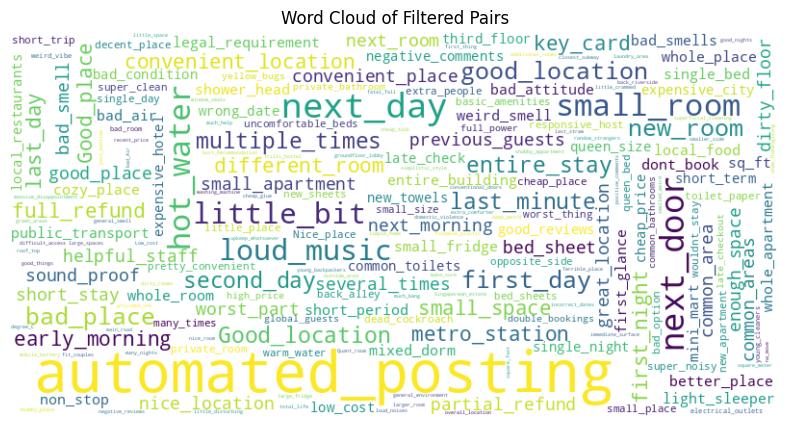

In [ ]:
word_pair_freq = Counter(filtered_pairs)
good_pair_freq = Counter(tokensng)
text_for_wordcloud = ' '.join(filtered_pairs)

# 生成词云图
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_pair_freq)
# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Pairs')
plt.show()

The results is bad, containing many good words. I want to try whether we can filter them out and find out what 's bad about our listings

In [ ]:
df_freq = pd.DataFrame(list(word_pair_freq.items()), columns=['WordPair', 'Frequency'])
df_freq['WordPairModified'] = df_freq['WordPair'].apply(lambda pair: pair.replace('_', ' '))
df_freq['SentimentScore'] = df_freq['WordPairModified'].apply(lambda pair: sid.polarity_scores(pair)['compound'])

# 添加情感标签列（积极、中性、消极）
df_freq['SentimentLabel'] = df_freq['SentimentScore'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

In [ ]:
df_freq

,WordPair,Frequency,WordPairModified,SentimentScore,SentimentLabel
0,automated_posting,55,automated posting,0.0000,neutral
1,Singaporean_estate,1,Singaporean estate,0.0000,neutral
2,bad_Air,1,bad Air,-0.5423,negative
3,Good_place,4,Good place,0.4404,positive
4,negative_reviews,1,negative reviews,-0.5719,negative
...,...,...,...,...,...
1158,clean_etc,1,clean etc,0.4019,positive
1159,relative_accommodation,1,relative accommodation,0.0000,neutral
1160,European_capitals,1,European capitals,0.0000,neutral
1161,static_blinds,1,static blinds,0.0000,neutral


In [ ]:
len(df_freq.query('SentimentLabel==\'neutral\' '))

801

In [ ]:
len(df_freq.query('SentimentLabel ==\'positive\' '))

158

In [ ]:
len(df_freq.query('SentimentLabel ==\'negative\' '))

204

In [ ]:
bad_reviews_pairs = df_freq.query('SentimentLabel ==\'negative\' ')
bad_reviews_pairs

,WordPair,Frequency,WordPairModified,SentimentScore,SentimentLabel
2,bad_Air,1,bad Air,-0.5423,negative
4,negative_reviews,1,negative reviews,-0.5719,negative
28,Terrible_place,1,Terrible place,-0.4767,negative
36,dirty_rooms,1,dirty rooms,-0.4404,negative
63,little_disturbing,1,little disturbing,-0.4601,negative
...,...,...,...,...,...
1134,worse_alternative,1,worse alternative,-0.4767,negative
1140,low_rating,1,low rating,-0.2732,negative
1145,bad_faith,1,bad faith,-0.1779,negative
1151,little_confusing,1,little confusing,-0.1548,negative


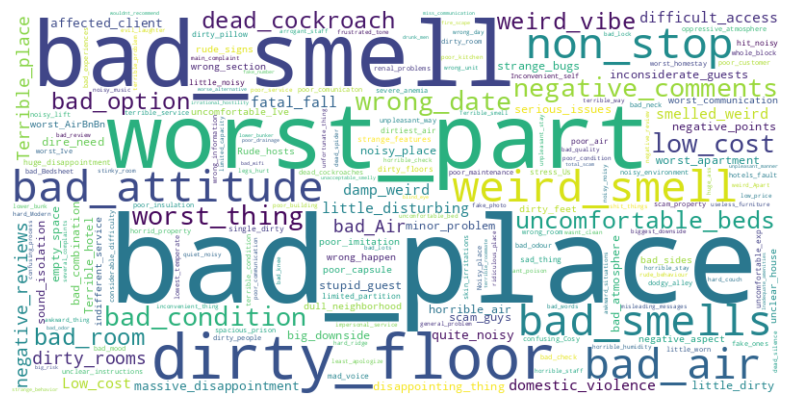

In [ ]:
word_freq_dict = dict(zip(bad_reviews_pairs['WordPair'], bad_reviews_pairs['Frequency']))

# 生成词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Word Cloud from DataFrame')
plt.show()

In [ ]:
good_pair_freq

Counter({'pleasant_stay': 162,
         'new_place': 4,
         'amazing_place': 40,
         'nearest_bus': 19,
         'stylish_touch': 1,
         'great_host': 276,
         'good_facilities': 20,
         'east_side': 4,
         'friendly_host': 82,
         'interior_design': 11,
         'Queen_bed': 1,
         'bus_stops': 15,
         'accomodative_host': 1,
         'clean_apartment': 58,
         'great_pool': 9,
         'close_access': 5,
         'good_host': 58,
         'great_location': 581,
         'modern_decorations': 1,
         'tidy_room': 6,
         'shared_apartment': 2,
         'Easy_access': 37,
         'sophisticated_option': 1,
         'detailed_instructions': 21,
         'residential_area': 30,
         'arrival_snack': 1,
         'outside_environment': 1,
         'warm_rain': 1,
         'safe_country': 1,
         'many_gardens': 1,
         'beautiful_touches': 1,
         'pleasant_visit': 1,
         'responsive_host': 72,
         'limite

In [ ]:
df_freq_good = pd.DataFrame(list(good_pair_freq.items()), columns=['WordPair', 'Frequency'])
df_freq_good['WordPairModified'] = df_freq_good['WordPair'].apply(lambda pair: pair.replace('_', ' '))
df_freq_good['SentimentScore'] = df_freq_good['WordPairModified'].apply(lambda pair: sid.polarity_scores(pair)['compound'])

# 添加情感标签列（积极、中性、消极）
df_freq_good['SentimentLabel'] = df_freq_good['SentimentScore'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))
df_freq_good

,WordPair,Frequency,WordPairModified,SentimentScore,SentimentLabel
0,pleasant_stay,162,pleasant stay,0.5106,positive
1,new_place,4,new place,0.0000,neutral
2,amazing_place,40,amazing place,0.5859,positive
3,nearest_bus,19,nearest bus,0.0000,neutral
4,stylish_touch,1,stylish touch,0.0000,neutral
...,...,...,...,...,...
11001,local_goodies,1,local goodies,0.0000,neutral
11002,quick_answer,1,quick answer,0.0000,neutral
11003,attached_toilets,1,attached toilets,0.0000,neutral
11004,double_room,1,double room,0.0000,neutral


In [ ]:
len(df_freq_good.query('SentimentLabel==\'neutral\' '))

6736

In [ ]:
len(df_freq_good.query('SentimentLabel==\'positive\' '))

3894

In [ ]:
len(df_freq_good.query('SentimentLabel==\'negative\' '))

376

In [ ]:
good_reviews_pairs = df_freq_good.query('SentimentLabel ==\'positive\' ')
good_reviews_pairs

,WordPair,Frequency,WordPairModified,SentimentScore,SentimentLabel
0,pleasant_stay,162,pleasant stay,0.5106,positive
2,amazing_place,40,amazing place,0.5859,positive
5,great_host,276,great host,0.6249,positive
6,good_facilities,20,good facilities,0.4404,positive
8,friendly_host,82,friendly host,0.4939,positive
...,...,...,...,...,...
10985,beautiful_walk,1,beautiful walk,0.5994,positive
10989,clean_perfect,1,clean perfect,0.7506,positive
10991,Nice_reception,1,Nice reception,0.4215,positive
11000,shared_one,1,shared one,0.3400,positive


In [ ]:
good_reviews_pairs['WordPairModified'] = good_reviews_pairs['WordPair'].str.lower()

<ipython-input-66-24bd5f0fe27d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_reviews_pairs['WordPairModified'] = good_reviews_pairs['WordPair'].str.lower()


In [ ]:
lowercase_wordpair_freq = good_reviews_pairs.groupby('WordPairModified')['Frequency'].sum().reset_index()
# 将 SentimentScore 和 SentimentLabel 列与新的频率 DataFrame 合并
result_df = pd.merge(lowercase_wordpair_freq, good_reviews_pairs[['WordPairModified', 'SentimentScore', 'SentimentLabel']], on='WordPairModified')

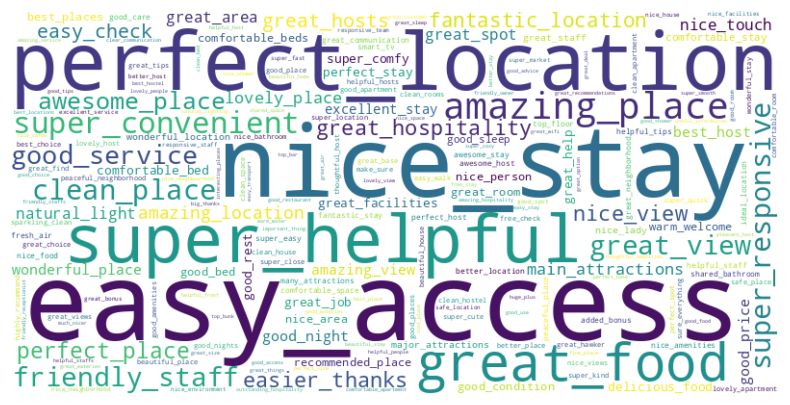

In [ ]:
good_word_freq_dict = dict(zip(good_reviews_pairs['WordPairModified'], good_reviews_pairs['Frequency']))

# 生成词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(good_word_freq_dict)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('2-gram: Attractive Aspects')
plt.show()

Model Evaluation: Accuracy, Recall, all that

In [ ]:
# Sample about 20 reviews from
sample_data = results.sample(n=40, random_state=32)
pd.set_option('display.max_colwidth', None)
sample_data['comments_cd']

14285                                                                              Value for money in a private room with ample space and all the essentials you need, very good location in Chinatown . Shared bathroom is clean and not crowded . One thing I'd suggest is to keep all the mops, cleaning supplies and sundries in a closed cabinet in the bathroom, as it looks dirty/cluttered and doesn't go well with the placid minimalist modern design . Another thing to note for travelers: there's no elevator and you must always keep your phone with you (even in the shower) because you use your phone app as the key to get in your room (after a while, a bit inconvenient) . Other than that, comfortable stay . Thanks, Fang !
15228                                                                                                                                                                                                                                                                               

In [ ]:
label_list =  [1] * 4+[0]+[1]*35

# 将 -1 转换为 'negative'
label_list_positive_negative = ['positive' if label == 1 else 'neutral' for label in label_list]

# 打印转换后的列表
print(label_list_positive_negative)

['positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive']


In [ ]:
sample_data['manual_sentiment_labels'] = label_list_positive_negative
sample_data

,listing_id,reviewer_id,Date,comments_cd,topics,top_topic,sentiment,sentiment_nltk,sentiment_tran,label,Final_Result,manual_sentiment_labels
14285,5.107572e+07,75337886,12/1/2023,"Value for money in a private room with ample space and all the essentials you need, very good location in Chinatown . Shared bathroom is clean and not crowded . One thing I'd suggest is to keep all the mops, cleaning supplies and sundries in a closed cabinet in the bathroom, as it looks dirty/cluttered and doesn't go well with the placid minimalist modern design . Another thing to note for travelers: there's no elevator and you must always keep your phone with you (even in the shower) because you use your phone app as the key to get in your room (after a while, a bit inconvenient) . Other than that, comfortable stay . Thanks, Fang !","[(1, 0.5975877), (2, 0.069518924), (3, 0.32422215)]",1,positive,positive,negative,Room Condition,positive,positive
15228,5.194694e+07,120674605,4/10/2022,"Staff extremely helpful, room was clean.","[(0, 0.12500666), (1, 0.13406874), (2, 0.12563194), (3, 0.61529267)]",3,positive,positive,positive,Value,positive,positive
14353,5.107638e+07,294299110,29/12/2021,"Great cute room, cozy aesthetic layouts and decent location near city but not too near","[(0, 0.068248615), (1, 0.06353647), (2, 0.063422166), (3, 0.80479276)]",3,positive,positive,positive,Value,positive,positive
11101,4.208166e+07,161470611,16/8/2022,"Great place for a quick visit of Singapour. Excellent value for money!<br/>At the time, many construction sites around there so quite noisy from very early in the morning.","[(0, 0.03634036), (1, 0.7116288), (2, 0.037321057), (3, 0.21470974)]",1,positive,positive,positive,Room Condition,positive,positive
10140,3.791635e+07,240483072,5/6/2023,Everything was great except my shower was cold for the whole week I stayed there. Staff was very helpful with calling taxis.,"[(0, 0.5930102), (1, 0.06417859), (2, 0.06422131), (3, 0.27858993)]",0,positive,positive,positive,Location,positive,neutral
11238,4.208166e+07,232705343,29/6/2023,The room was clean and comfy and staff were polite and helpful. Mrt station is just 5 mins walk and lots if restaurants nearby,"[(0, 0.64582074), (1, 0.03718832), (2, 0.035933536), (3, 0.28105742)]",0,positive,positive,positive,Location,positive,positive
8415,3.360428e+07,157995346,30/6/2019,"The unit itself was quite alright. Clean, well prepared, however there are open switches on the floor in the middle of the unit that juts out and is quite hazardous and easy to trip over. The listing doesn't mention it, but there might be two different units that are identical that are owned by the same host and you may get one or the other. The unit I got was not the one in the image and certain things were different. <br/>The location was quite convenient and near to many amenities and near a station and big mall. However, it can get noisy at night and is technically located above shop lots so the entrance itself is somewhat behind a business which wasnt mentioned in the listing","[(0, 0.44488472), (1, 0.35013092), (2, 0.09886396), (3, 0.1061204)]",0,positive,positive,negative,Location,positive,positive
8179,3.100355e+07,378422033,9/5/2022,"Mark was an amazing host, he was very accommodating to my request for early check in. He was very diligent with providing amazing locations and details of food and essential areas. The location personally for myself was far from where I wanted to go. But amazing if youre staying long term and want the essential daily lifestyle.","[(0, 0.92509043), (1, 0.023912326), (2, 0.025583904), (3, 0.0254133)]",0,positive,positive,positive,Location,positive,positive
11458,4.241729e+07,369335503,28/9/2020,Good place to take a rest,"[(0, 0.12500477), (1, 0.6170352), (2, 0.13295446), (3, 0.12500556)]",1,positive,positive,positive,Room Condition,positive,positive
7255,2.930270e+07,118246007,10/8/2019,"Highly recommended to everyone. Large room with airconditioner, clean and quiet. Mr.

In [ ]:
model1_correct = (sample_data['sentiment'] == sample_data['manual_sentiment_labels']).sum()
model1_accuracy=model1_correct/len(sample_data)
model1_accuracy

0.925

In [ ]:
model2_correct = (sample_data['sentiment_nltk'] == sample_data['manual_sentiment_labels']).sum()
model2_accuracy=model2_correct/len(sample_data)
model2_accuracy

0.9

In [ ]:
model3_correct = (sample_data['sentiment_tran'] == sample_data['manual_sentiment_labels']).sum()
model3_accuracy=model3_correct/len(sample_data)
model3_accuracy

0.85

In [ ]:
overall_correct = (sample_data['Final_Result'] == sample_data['manual_sentiment_labels']).sum()
overall_accuracy=overall_correct/len(sample_data)
overall_accuracy

0.95

In [ ]:
results.to_csv('output.csv', index=False)

In [ ]:
bad_reviews_word_pair=bad_reviews_pairs.sort_values(by='SentimentScore',ascending=False)
# results.to_csv('bad_reviews_word_pair.csv', index=False)
bad_reviews_word_pair['sentimentscores_modified']=bad_reviews_word_pair['SentimentScore']*-100
bad_reviews_word_pair=bad_reviews_word_pair[bad_reviews_word_pair['WordPair']!='dead_silence']
bad_reviews_word_pair=bad_reviews_word_pair[bad_reviews_word_pair['WordPair']!='worst_AirBnBn']

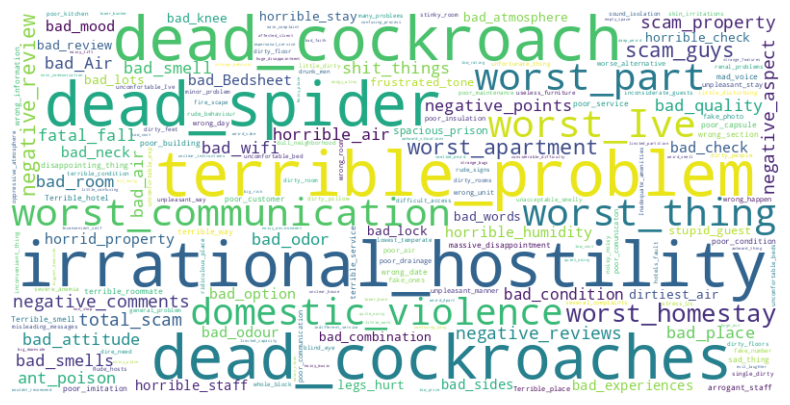

In [ ]:
bad_word_freq_dict = dict(zip(bad_reviews_word_pair['WordPair'], bad_reviews_word_pair['sentimentscores_modified']))

# 生成词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bad_word_freq_dict)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('2-gram: Attractive Aspects')
plt.show()

In [ ]:
reviews_list=scored_reviews.sort_values(by='compound',ascending=False)
good_review_list = reviews_list.query('compound>0')
bad_review_list = reviews_list.query('compound<0')

In [ ]:
bad_review_list

,review,compound,negativity,neutrality,positivity
2995,Nice place but can be noisy at night.,-0.0387,0.206,0.603,0.191
2635,"bed sheets don't fit mattress, bed location makes it warm",-0.0541,0.176,0.666,0.158
2896,"Great location, but no window in room.",-0.0644,0.271,0.483,0.246
1851,very small and noisy. but strategicly located,-0.1235,0.198,0.802,0.000
192,"Nice place, clean but a bit difficult to find food....",-0.1280,0.250,0.462,0.288
1629,Not recommended,-0.1511,0.614,0.386,0.000
1470,Tricky to find out,-0.1531,0.348,0.652,0.000
4,The location is very close to EXPO and Bus stops and MRT Stations. It is very convenient if the purpose is being close to EXPO.,-0.1531,0.062,0.938,0.000
2313,Very hard to live in.,-0.1761,0.297,0.703,0.000
2931,The mattress was very hard,-0.1761,0.297,0.703,0.000


In [ ]:
def tokenize_and_filter(review):
    # 分词
    words = word_tokenize(review)

    # 停用词
    stop_words = set(stopwords.words('english'))


    # 筛选排除停用词和自定义词汇
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() not in custom_words_to_remove]

    return filtered_words

good_review_list['adj_noun pairs']=good_review_list['review'].apply(tokenize_and_filter)
bad_review_list['adj_noun pairs']=bad_review_list['review'].apply(tokenize_and_filter)
bad_review_list

<ipython-input-108-f5b7a0f319a3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_review_list['adj_noun pairs']=good_review_list['review'].apply(tokenize_and_filter)
<ipython-input-108-f5b7a0f319a3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_review_list['adj_noun pairs']=bad_review_list['review'].apply(tokenize_and_filter)


,review,compound,negativity,neutrality,positivity,adj_noun pairs
2995,Nice place but can be noisy at night.,-0.0387,0.206,0.603,0.191,"[nice, place, noisy, night]"
2635,"bed sheets don't fit mattress, bed location makes it warm",-0.0541,0.176,0.666,0.158,"[bed, sheets, fit, mattress, bed, location, makes, warm]"
2896,"Great location, but no window in room.",-0.0644,0.271,0.483,0.246,"[great, location, window, room]"
1851,very small and noisy. but strategicly located,-0.1235,0.198,0.802,0.000,"[small, noisy, strategicly, located]"
192,"Nice place, clean but a bit difficult to find food....",-0.1280,0.250,0.462,0.288,"[nice, place, clean, bit, difficult, find, food]"
1629,Not recommended,-0.1511,0.614,0.386,0.000,[recommended]
1470,Tricky to find out,-0.1531,0.348,0.652,0.000,"[tricky, find]"
4,The location is very close to EXPO and Bus stops and MRT Stations. It is very convenient if the purpose is being close to EXPO.,-0.1531,0.062,0.938,0.000,"[location, close, expo, bus, stops, mrt, stations, convenient, purpose, close, expo]"
2313,Very hard to live in.,-0.1761,0.297,0.703,0.000,"[hard, live]"
2931,The mattress was very hard,-0.1761,0.297,0.703,0.000,"[mattress, hard]"
